In [1]:
import pandas as pd
import numpy as np

In [2]:
ww = pd.read_csv("C:/Users/Uche Buzz/Desktop/School stuff/Final Project/Datasets/weatherdata.csv")

In [3]:
ww.head()

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,"Wolverhampton, England",2000-01-01,46.6,33.6,40.7,44.5,33.6,39.8,39.4,95.1,...,NaN,NaN,NaN,2000-01-01T08:19:50,2000-01-01T16:03:54,0.83,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,rain,"03529099999,03414099999,03520099999,0335409999..."
1,"Wolverhampton, England",2000-01-02,50.8,39.3,44.3,50.8,35.0,40.8,41.2,89.1,...,NaN,NaN,NaN,2000-01-02T08:19:43,2000-01-02T16:04:59,0.86,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"03414099999,03529099999,03520099999,0335409999..."
2,"Wolverhampton, England",2000-01-03,50.9,38.5,45.9,50.9,34.2,42.4,42.5,88.2,...,NaN,NaN,NaN,2000-01-03T08:19:32,2000-01-03T16:06:07,0.89,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,rain,"03414099999,03529099999,03520099999,0335409999..."
3,"Wolverhampton, England",2000-01-04,42.4,34.1,37.4,35.9,27.5,31.6,34.3,88.6,...,NaN,NaN,NaN,2000-01-04T08:19:18,2000-01-04T16:07:17,0.92,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,"03414099999,03529099999,03520099999,0335409999..."
4,"Wolverhampton, England",2000-01-05,52.1,35.1,43.5,52.1,28.5,37.9,39.1,84.5,...,NaN,NaN,NaN,2000-01-05T08:19:00,2000-01-05T16:08:30,0.96,"Rain, Partially cloudy",Partly cloudy throughout the day with afternoo...,rain,"03414099999,03529099999,03520099999,0335409999..."


In [4]:
#convert to celcius
def F_to_c(f):
    return   (f - 32)* 0.55 

In [5]:
ww['tempmax'] = ww['tempmax'].apply(F_to_c)
ww['tempmin'] = ww['tempmin'].apply(F_to_c)
ww['temp'] = ww['temp'].apply(F_to_c)

In [6]:
ww.apply(pd.isnull).sum()

name                   0
datetime               0
tempmax                0
tempmin                0
temp                   0
feelslikemax           0
feelslikemin           0
feelslike              0
dew                    0
humidity               0
precip                 0
precipprob             0
precipcover            0
preciptype          1898
snow                 366
snowdepth            366
windgust            4491
windspeed              0
winddir                0
sealevelpressure       0
cloudcover             0
visibility             0
solarradiation      3623
solarenergy         3623
uvindex             3623
severerisk          8843
sunrise                0
sunset                 0
moonphase              0
conditions             0
description            0
icon                   0
stations               0
dtype: int64

In [7]:
cw = ww[['tempmax','tempmin','temp','precip','datetime']].copy()

In [8]:
cw

,tempmax,tempmin,temp,precip,datetime
0,8.030,0.880,4.785,0.052,2000-01-01
1,10.340,4.015,6.765,0.000,2000-01-02
2,10.395,3.575,7.645,0.071,2000-01-03
3,5.720,1.155,2.970,0.037,2000-01-04
4,11.055,1.705,6.325,0.011,2000-01-05
...,...,...,...,...,...
8838,17.490,9.350,13.200,0.000,2024-04-12
8839,14.850,8.525,11.550,0.004,2024-04-13
8840,12.210,4.620,8.800,0.000,2024-04-14
8841,9.240,6.765,7.810,0.299,2024-04-15


In [9]:
cw

,tempmax,tempmin,temp,precip,datetime
0,8.030,0.880,4.785,0.052,2000-01-01
1,10.340,4.015,6.765,0.000,2000-01-02
2,10.395,3.575,7.645,0.071,2000-01-03
3,5.720,1.155,2.970,0.037,2000-01-04
4,11.055,1.705,6.325,0.011,2000-01-05
...,...,...,...,...,...
8838,17.490,9.350,13.200,0.000,2024-04-12
8839,14.850,8.525,11.550,0.004,2024-04-13
8840,12.210,4.620,8.800,0.000,2024-04-14
8841,9.240,6.765,7.810,0.299,2024-04-15


In [10]:
cw.apply(pd.isnull).sum()

tempmax     0
tempmin     0
temp        0
precip      0
datetime    0
dtype: int64

In [11]:
cw.dtypes

tempmax     float64
tempmin     float64
temp        float64
precip      float64
datetime     object
dtype: object

In [12]:
cw['datetime'] = pd.to_datetime(cw['datetime'])
cw.set_index('datetime', inplace=True)

In [13]:
cw['month'] = cw.index.month
cw['day'] = cw.index.day
cw['year'] = cw.index.year

In [14]:
cw

,tempmax,tempmin,temp,precip,month,day,year
datetime,,,,,,,
2000-01-01,8.030,0.880,4.785,0.052,1,1,2000
2000-01-02,10.340,4.015,6.765,0.000,1,2,2000
2000-01-03,10.395,3.575,7.645,0.071,1,3,2000
2000-01-04,5.720,1.155,2.970,0.037,1,4,2000
2000-01-05,11.055,1.705,6.325,0.011,1,5,2000
...,...,...,...,...,...,...,...
2024-04-12,17.490,9.350,13.200,0.000,4,12,2024
2024-04-13,14.850,8.525,11.550,0.004,4,13,2024
2024-04-14,12.210,4.620,8.800,0.000,4,14,2024


In [15]:
print(cw.columns)



Index(['tempmax', 'tempmin', 'temp', 'precip', 'month', 'day', 'year'], dtype='object')


In [16]:
cw['target'] = cw.shift(-1)['temp']

In [17]:
cw

,tempmax,tempmin,temp,precip,month,day,year,target
datetime,,,,,,,,
2000-01-01,8.030,0.880,4.785,0.052,1,1,2000,6.765
2000-01-02,10.340,4.015,6.765,0.000,1,2,2000,7.645
2000-01-03,10.395,3.575,7.645,0.071,1,3,2000,2.970
2000-01-04,5.720,1.155,2.970,0.037,1,4,2000,6.325
2000-01-05,11.055,1.705,6.325,0.011,1,5,2000,6.985
...,...,...,...,...,...,...,...,...
2024-04-12,17.490,9.350,13.200,0.000,4,12,2024,11.550
2024-04-13,14.850,8.525,11.550,0.004,4,13,2024,8.800
2024-04-14,12.210,4.620,8.800,0.000,4,14,2024,7.810


In [18]:
cw = cw.ffill()

In [19]:
cw

,tempmax,tempmin,temp,precip,month,day,year,target
datetime,,,,,,,,
2000-01-01,8.030,0.880,4.785,0.052,1,1,2000,6.765
2000-01-02,10.340,4.015,6.765,0.000,1,2,2000,7.645
2000-01-03,10.395,3.575,7.645,0.071,1,3,2000,2.970
2000-01-04,5.720,1.155,2.970,0.037,1,4,2000,6.325
2000-01-05,11.055,1.705,6.325,0.011,1,5,2000,6.985
...,...,...,...,...,...,...,...,...
2024-04-12,17.490,9.350,13.200,0.000,4,12,2024,11.550
2024-04-13,14.850,8.525,11.550,0.004,4,13,2024,8.800
2024-04-14,12.210,4.620,8.800,0.000,4,14,2024,7.810


In [20]:
pip install svm


Note: you may need to restart the kernel to use updated packages.


In [44]:
from sklearn.linear_model import Ridge
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [58]:
#models
model = Ridge (alpha=.1)
#svm_model = SVC(kernel='linear')
#model = RandomForestClassifier(n_estimators=100, random_state=42)
#model = DecisionTreeClassifier(random_state=42)


In [59]:
predictors = ['precip',"tempmax",'tempmin',"temp", "month", "day", "year"]

In [60]:
X = cw.loc[:'2020-12-31']
y = cw.loc['2021-01-01']

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

ValueError: Found input variables with inconsistent numbers of samples: [7641, 8]

In [62]:
#train = cw.loc[:'2020-12-31']
#test = cw.loc['2021-01-01':]

In [64]:
model.fit(train[predictors], train['target'])

Ridge(alpha=0.1)

In [65]:
predictions = model.predict(test[predictors])

In [66]:
from sklearn.metrics import mean_absolute_error

In [67]:
mean_absolute_error(test['target'], predictions)

1.4351032851267782

In [68]:
combined = pd.concat([test['target'], pd.Series(predictions, index = test.index)], axis = 1)

In [69]:
combined.columns = ['actual','predictions']

In [70]:
combined

,actual,predictions
datetime,,
2021-01-01,0.220,1.620681
2021-01-02,2.200,0.439850
2021-01-03,2.365,2.195497
2021-01-04,1.760,2.464000
2021-01-05,0.385,2.025247
...,...,...
2024-04-12,11.550,13.064346
2024-04-13,8.800,11.285277
2024-04-14,7.810,8.864909


<Axes: xlabel='datetime'>

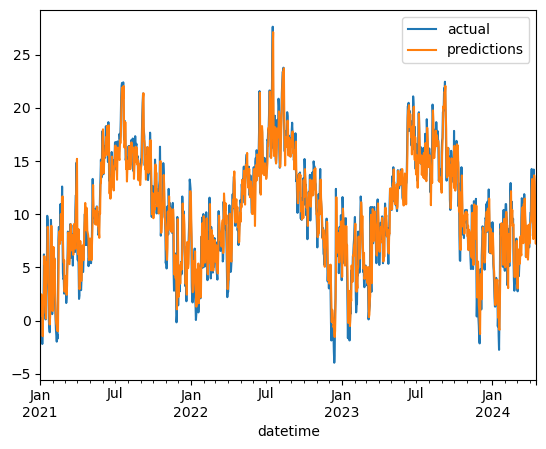

In [71]:
combined.plot()

In [72]:
model.coef_

array([-0.53236991,  0.31813972,  0.00778662,  0.56506739,  0.02920772,
        0.00173393, -0.00105977])

In [ ]:
#Writing a function to practice with different models

In [ ]:
def create_predictions(predictions, cw, model):
    train = cw.loc[:'2020-12-31']
    test = cw.loc['2021-01-01':]
    model.fit(train[predictors], train['target'])
    predictions = model.predict(test[predictors])
    error = mean_absolute_error(test['target'], predictions)
    combined = pd.concat([test['target'], pd.Series(predictions, index = test.index)], axis = 1)
    combined.columns = ['actual','predictions']
    
    return error, combined

In [ ]:
cw['temp__max'] = cw['temp'].rolling(30).mean()

In [ ]:
cw

In [ ]:
cw = cw.iloc[30:,:].copy()

In [ ]:
#cw['min_max'] = cw['tempmax'] / cw['tempmin']
#cw['min_max'] = np.where(cw['tempmin'] == 0, np.nan, cw['tempmax'] / cw['tempmin'])
cw['min_max'] = np.where(cw['tempmin'] == 0, cw['tempmax'], cw['tempmax'] / cw['tempmin'])


In [ ]:
predictors = ['precip',"tempmax",'tempmin',"temp", "month", "day", "year", 'min_max', 'temp__max']

In [ ]:
error, combined = create_predictions(predictions, cw, model)

In [ ]:
error

In [ ]:
combined


In [ ]:
combined.plot()

In [ ]:
cw['monthly_avg'] = cw['temp'].groupby(cw.index.month).apply(lambda x: x.expanding(1).mean())